In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

* 图

In [2]:
import numpy as np

In [31]:
x = np.linspace(-3, 3, 50)
y1 = 2*x+1
y2 = x**2

*1. 绘图修改line类型*

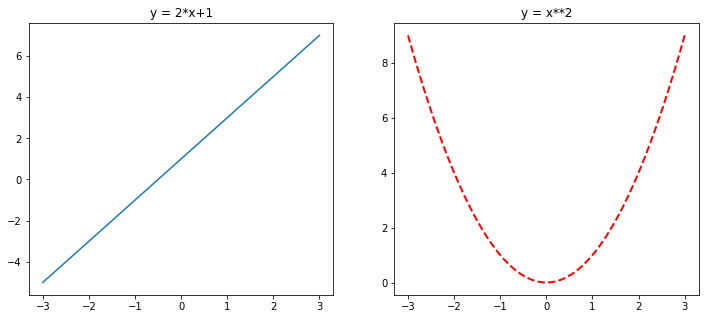

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(x, y1)
axes[0].set_title('y = 2*x+1')

axes[1].plot(x, y2, color='red', linewidth=2, linestyle='--')
axes[1].set_title('y = x**2')

plt.show()

*2. 修改y轴范围，x轴刻度；一图多轴，移动轴的位置*

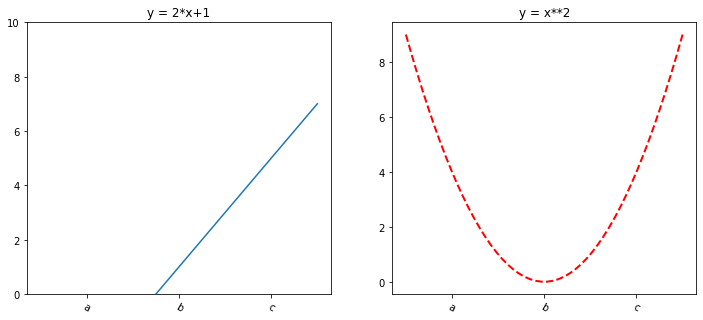

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(x, y1)
axes[0].plot(x,-y1, color='green')
axes[0].set_title('y = 2*x+1')
axes[0].set_ylim((0,10))
axes[0].set_xticks([-2, 0, 2], ['a', 'b', 'c'], rotation=-30)

axes[1].plot(x, y2, color='red', linewidth=2, linestyle='--')
axes[1].set_title('y = x**2')
axes[1].set_xticks([-2, 0, 2], ['a', 'b', 'c'], rotation=-30)

plt.show()

*3. 图例*

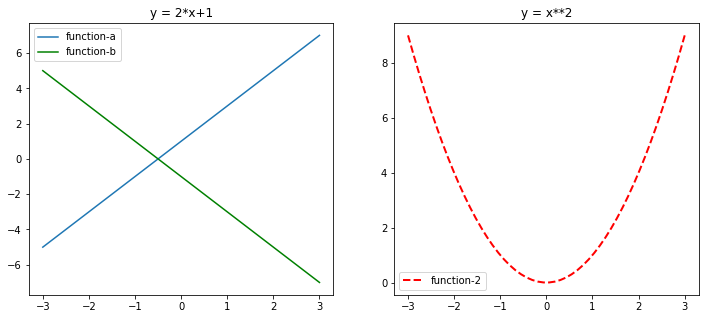

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(x, y1, label='function-a')
axes[0].plot(x,-y1, color='green', label='function-b')
axes[0].set_title('y = 2*x+1')
axes[0].legend(loc='upper left')

axes[1].plot(x, y2, color='red', linewidth=2, linestyle='--', label='function-2')
axes[1].set_title('y = x**2')
axes[1].legend(loc='best')

plt.show()

*4. 注释 annotation*

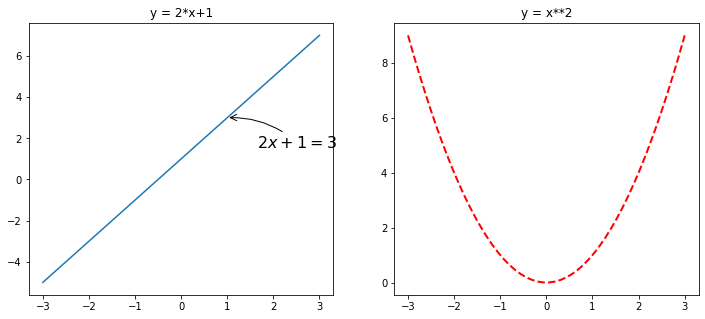

In [38]:
x0 = 1
y01 = 2*x0 + 1
y02 = x0**2

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(x, y1)
axes[0].set_title('y = 2*x+1')
axes[0].annotate(r'$2x+1=%s$'%y01, xy=(x0, y01), xytext=(+30,-30),  xycoords='data', textcoords='offset points', fontsize=16,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

axes[1].plot(x, y2, color='red', linewidth=2, linestyle='--')
axes[1].set_title('y = x**2')


plt.show()

*5. ticks能见度*

*6. 其他类型：散点图scatter、柱状图bar*

In [39]:
n = 12
X = np.arange(12)
Y1 = (1-X/float(n))*np.random.uniform(0.5, 1, n)
Y2 = (1-X/float(n))*np.random.uniform(0.5, 1, n)

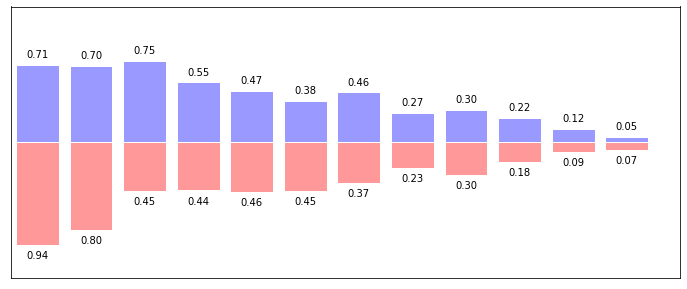

In [48]:
fix, axes = plt.subplots(1,1, figsize=(12, 5))

axes.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
axes.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

# 加上文字
for x,y in zip(X, Y1):
    # ha: horizontal alignment
    axes.text(x, y+0.05, r'%.2f'%y, ha='center', va='bottom')
    
for x,y in zip(X, Y2):
    # ha: horizontal alignment
    axes.text(x, -y-0.05, r'%.2f'%y, ha='center', va='top')

axes.set_xlim(-0.5, n)
axes.set_xticks(())
axes.set_ylim(-1.25, 1.25)
axes.set_yticks(())

plt.show()

*7. 等高线contour*

C:\Users\nk212\AppData\Local\Temp\ipykernel_62340\4104442690.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = axes.contour(X, Y, func(X, Y), 8, colors='black', linewidth=.5)  #等高线


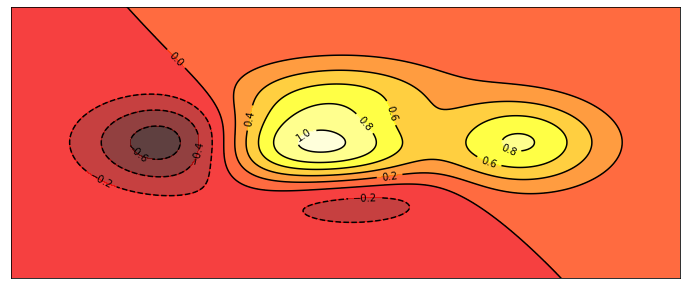

In [56]:
def func(x,y):
    return (1-x/2 + x**5 + y**3)*np.exp(-x**2 - y**2)


n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

fix, axes = plt.subplots(1,1, figsize=(12, 5))
axes.contourf(X, Y, func(X, Y), 8, alpha=0.75, cmap=plt.cm.hot)  # 面
C = axes.contour(X, Y, func(X, Y), 8, colors='black', linewidth=.5)  #等高线
# 8代表着等高线被分为8+2=10部分,0代表被分为两部分
axes.clabel(C, inline=True, fontsize=10)

axes.set_xticks(())
axes.set_yticks(())

plt.show()

*8. 3D画图*

In [57]:
from mpl_toolkits.mplot3d import Axes3D

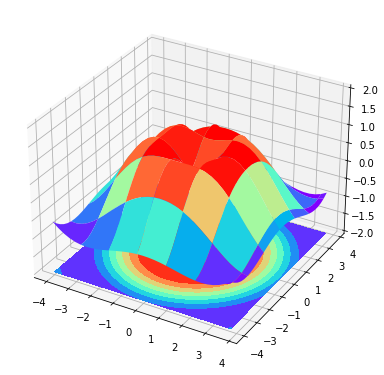

In [75]:
fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig, auto_add_to_figure=False)  # 会报错，需要消息
fig.add_axes(ax)

X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# 3D,修改rstride, cstride看作用， 颜色跨row和col几个才画下一个
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap=plt.get_cmap('rainbow'))
# zdir代表从Z轴往下压
ax.contourf(X,Y,Z, zdir='z', offset=-2, cmap='rainbow')
ax.set_zlim((-2,2))

plt.show()

*9. 分格显示*

In [77]:
import matplotlib.gridspec as gridspec

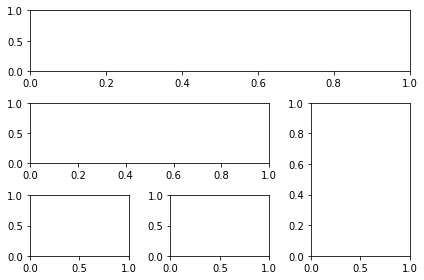

In [83]:
fig = plt.figure()

# # 方法一，subplot2grid， 把figure分为很多axis
# ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
# ax1.plot([1,2], [1,2])
# ax1.set_title('axis 1 title')

# ax2 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=1)
# ax3 = plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)
# ax4 = plt.subplot2grid((3,3), (2,0), colspan=1, rowspan=1)
# ax5 = plt.subplot2grid((3,3), (2,1), colspan=1, rowspan=1)


# 方法二：gridspec
# gs = gridspec.GridSpec(3,3)
# ax1 = plt.subplot(gs[0,:])
# ax2 = plt.subplot(gs[1,:2])
# ax3 = plt.subplot(gs[1:,2])
# ax4 = plt.subplot(gs[-1:,0])
# ax5 = plt.subplot(gs[-1:,-2])

plt.tight_layout()
plt.show()

*10. 图中图*

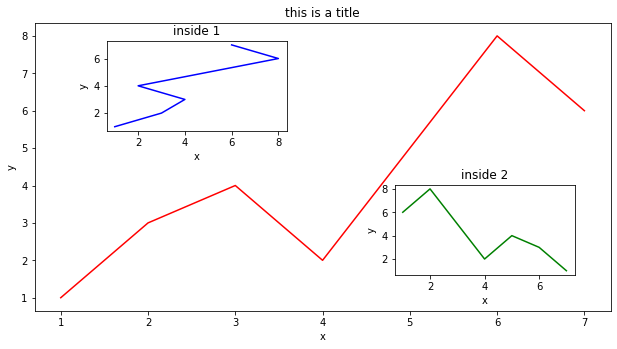

In [91]:
fig = plt.figure(figsize=(10,5))

x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]

left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])   
ax1.plot(x, y, color='red')
ax1.set_title('this is a title')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left, bottom, width, height])   
ax2.plot(y, x, color='blue')
ax2.set_title('inside 1')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(x, y[::-1], color='green')
plt.title('inside 2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

*11. 次坐标轴*

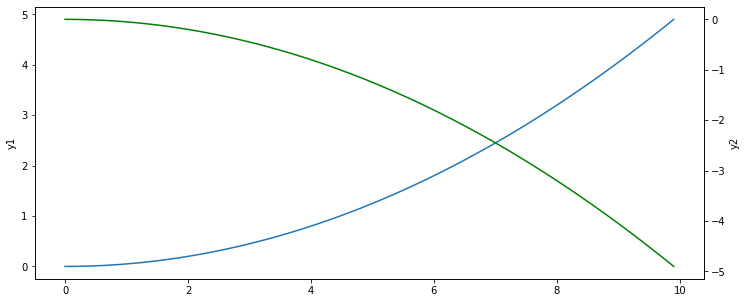

In [94]:
x = np.arange(0,10,0.1)
y1 = 0.05*x**2
y2 = -y1

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='green')
ax2.set_ylabel('y2')

plt.show()

*12. 动画*

In [95]:
from matplotlib import animation

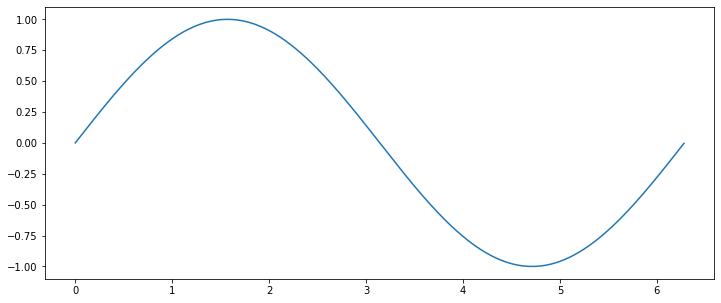

In [99]:
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(0,2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    # 第i帧
    line.set_ydata(np.sin(x + i/10))
    return line,

def init():
    # 第0帧
    line.set_ydata(np.sin(x))
    return line,
    
ani = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init, interval=20, blit=True)
# frames是100帧, interval是更新的频率，blit只更新变化的点还是刷新所有点

plt.show()